In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

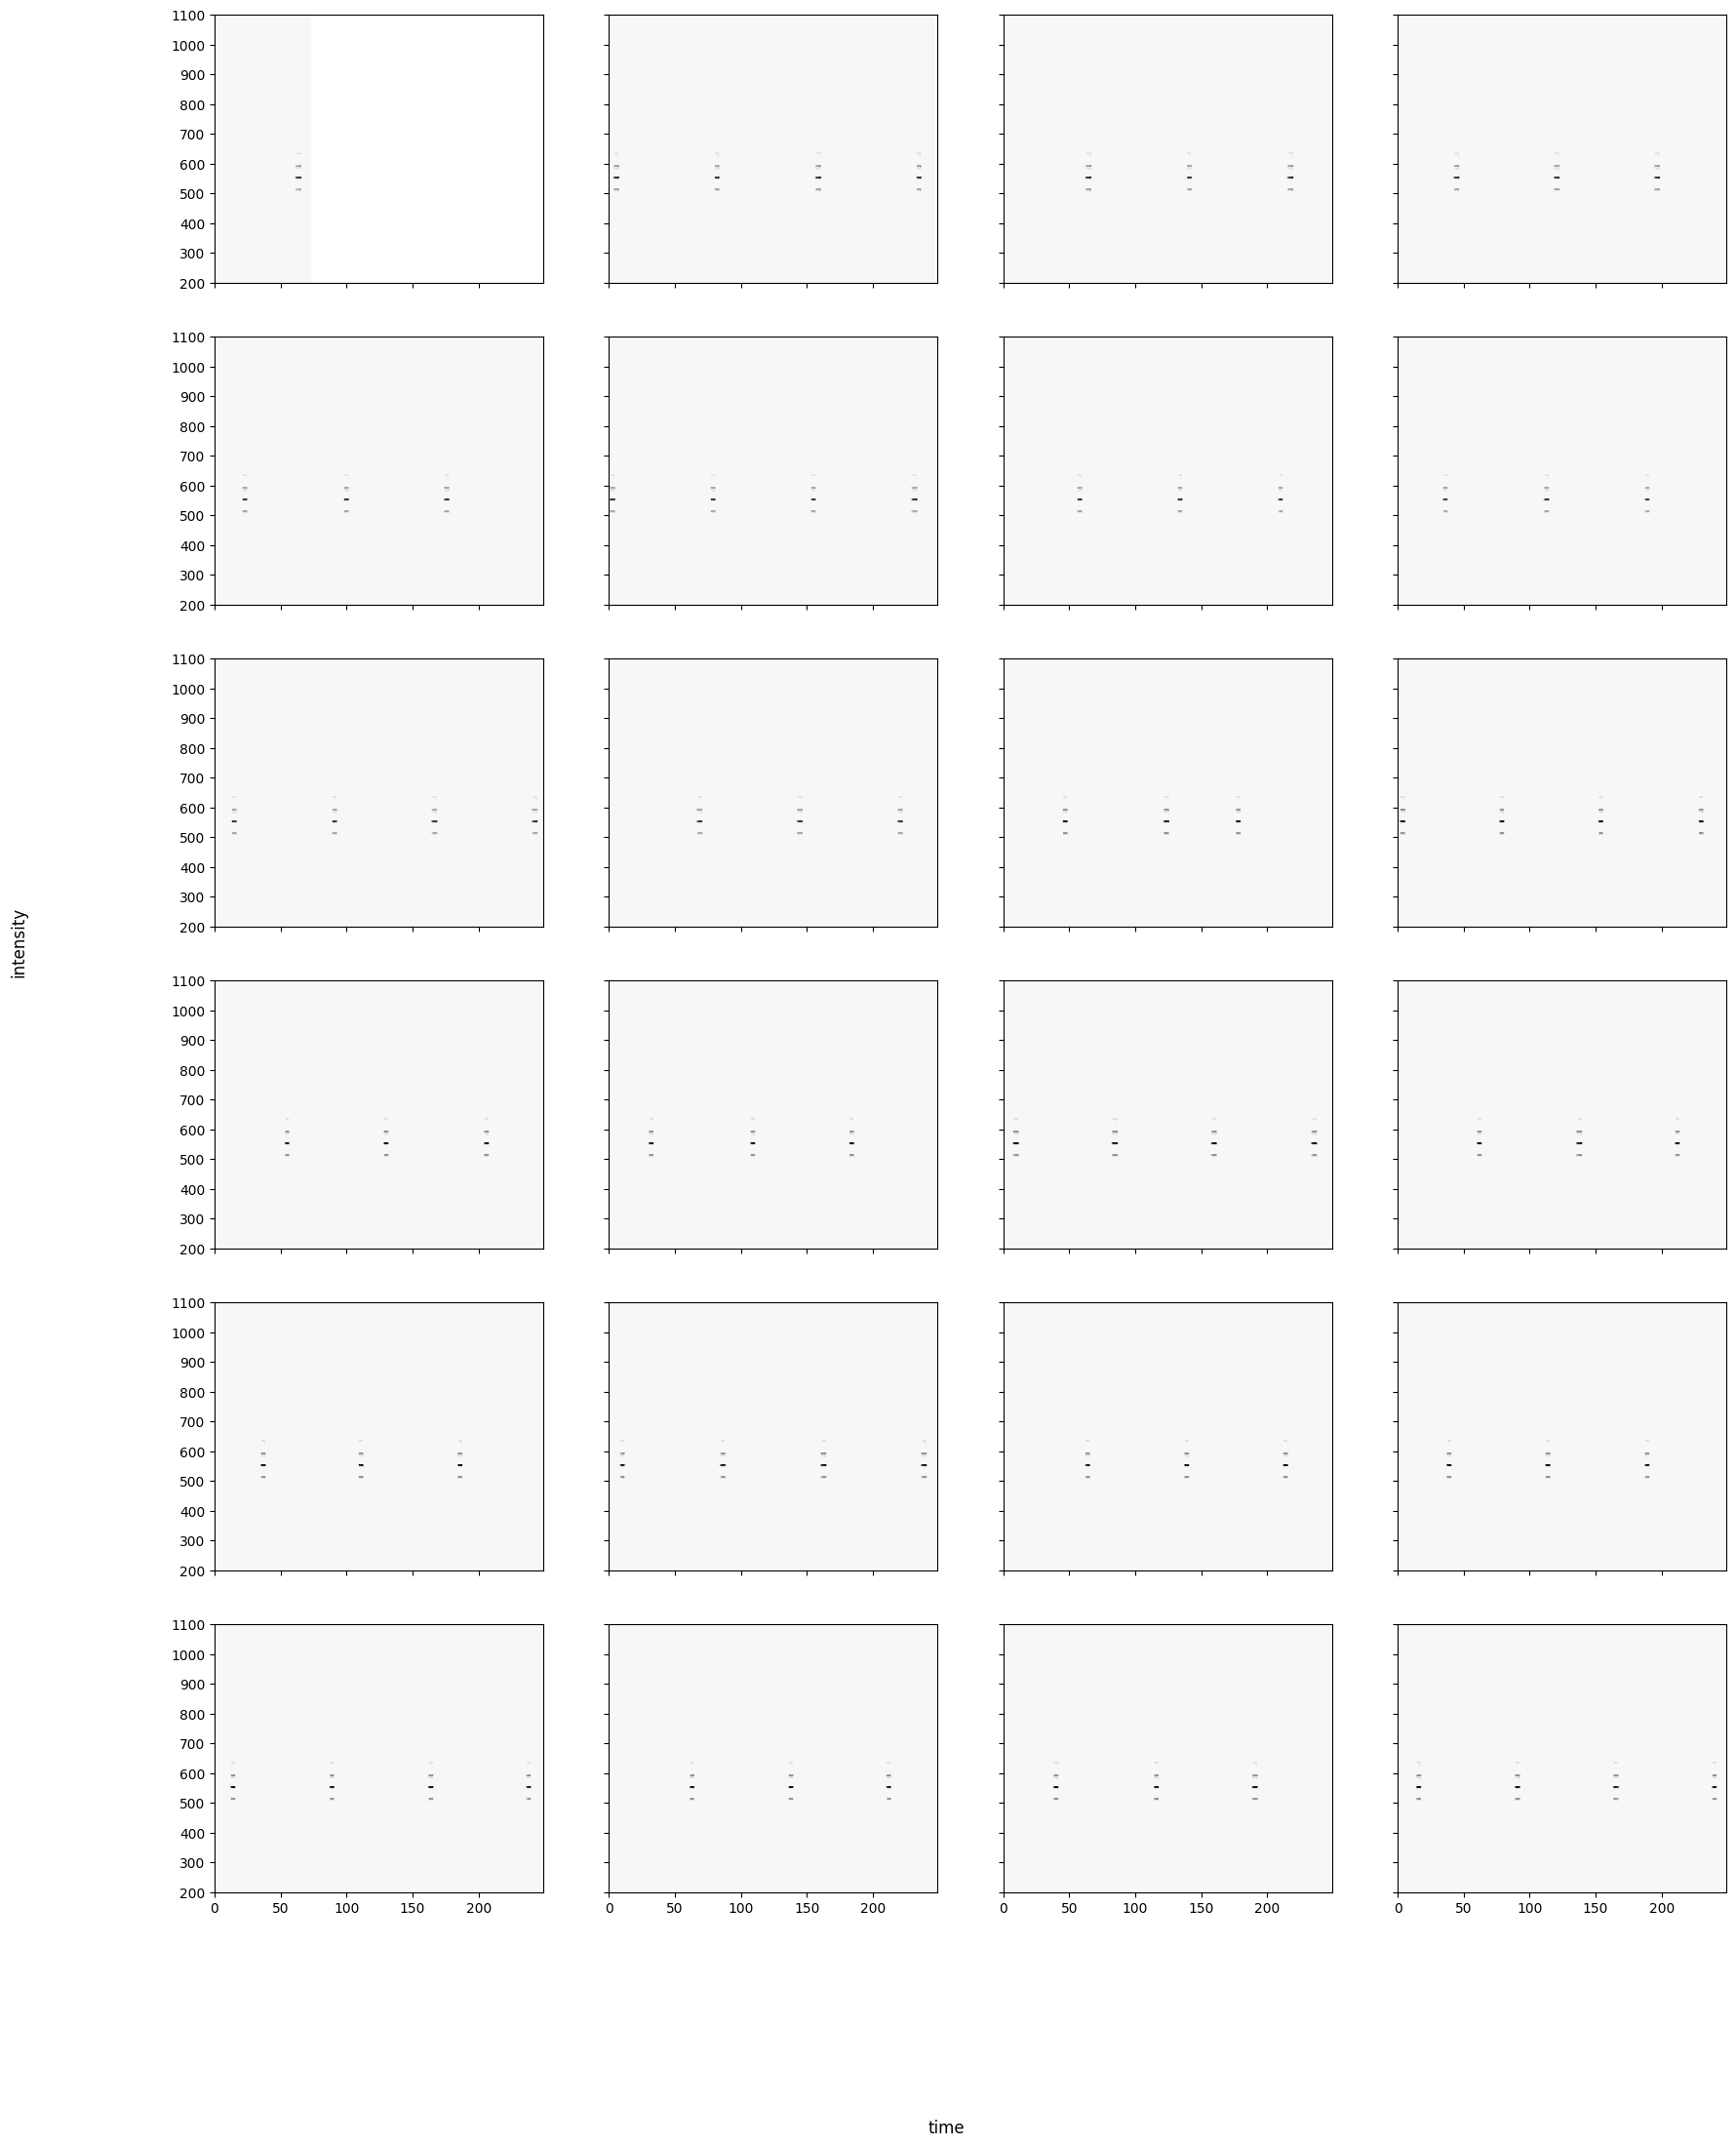

In [14]:
path = 'test_20241206'
file = os.listdir(path)

# prepare subplots
nrows = 6
ncols = 4
fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(20,25))

for file_idx in range(4,28): # study files from #4 to #27
    # import df
    df = pd.read_csv(path+'/'+file[file_idx], index_col='Time')

    x = range(len(df.index))
    y = range(len(df.columns))
    
    # replace negative values with zero
    for i in x:
        for j in y:
            if df.iloc[i,j]<0:
                df.iloc[i,j]=0
                
    X, Y = np.meshgrid(x, y)
    Z = df.T

    cst_xticks = []
    target = 100
    for elem in df.columns:
        if int(elem.split('.')[0]) == target:
            cst_xticks.append(elem)
            target += 100

    # make a corresponding subplot
    im = axs[(file_idx//4)-1, file_idx%4].contourf(X, Y, Z, cmap='Greys')
    axs[(file_idx//4)-1, file_idx%4].set(ylim=(200,1100))  

fig.supxlabel('time')
fig.supylabel('intensity')
# fig.subplots_adjust(right=1)
# fig.colorbar(im)
plt.show()